In [108]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")
import pandas as pd
from os.path import join

path = "/home/ki/projects/work/mchad/logs/multiruns/mchad-vary-center-weight/5/tb/version_0/15680/test-4/"

df = pd.read_csv(join(path, "tensors.tsv"), delimiter="\t", header=None)
df_meta = pd.read_csv(join(path, "metadata.tsv"), delimiter="\t", header=0)

In [109]:
df_meta

,label,known,distance
0,4,True,0.052420
1,8,True,0.201093
2,-1000,False,1.188257
3,0,True,0.166393
4,6,True,0.479497
...,...,...,...
4995,-1000,False,1.184080
4996,0,True,0.183547
4997,-1000,False,1.204082
4998,9,True,0.189438


In [110]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = TSNE()
x = pca.fit_transform(df.values)

/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


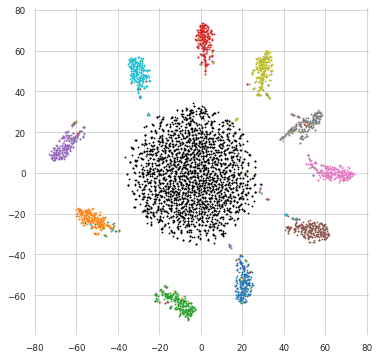

In [111]:
sb.set_palette(sb.color_palette("tab10"))

fix = plt.figure(figsize=(6,6))
for label in df_meta["label"].unique():
    if label < 0:
        continue
    idx = df_meta["label"] == label
    plt.scatter(x[idx,0], x[idx,1], label=label, s=1)

idx = df_meta["label"] < 0
plt.scatter(x[idx,0], x[idx,1], label=-1, s=1, color="black")
sb.despine(left=True, bottom=True)
plt.savefig("out/latent-cifar-lsun-resize.pgf")
# plt.legend()

In [123]:
from scipy.linalg import norm

norms = norm(df.values, ord=2, axis=1)

label = pd.Series(data=(df_meta["label"]>= 0).apply({True: "IN", False: "OOD"}.get), name="Label")

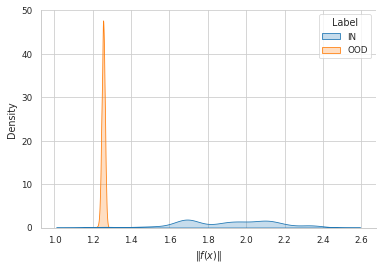

In [124]:
sb.kdeplot(x=norms, hue=label, common_norm=False, fill=True)
plt.xlabel("$\Vert f(x) \Vert $")
sb.despine()
plt.savefig("out/density_norm.pgf")

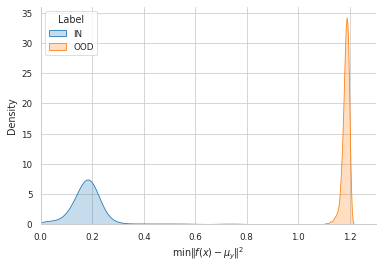

In [119]:
ax =  sb.kdeplot(x=df_meta["distance"], hue=label, common_norm=False, fill=True)
plt.xlabel("$\min \Vert f(x) - \mu_y \Vert^2$")
ax.legend_._set_loc(2)
plt.xlim([0.0, 1.3])
sb.despine()
# plt.legend(loc="upper right")
plt.savefig("out/density_distance.pgf")


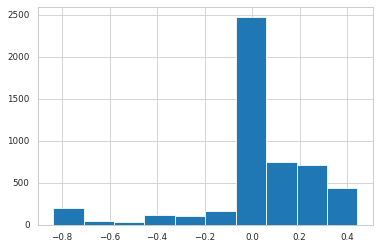

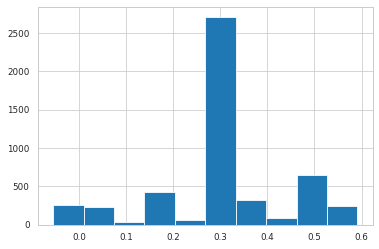

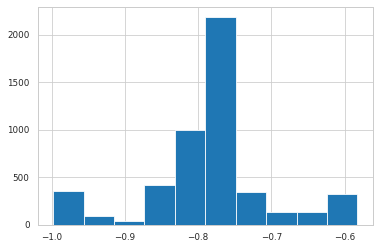

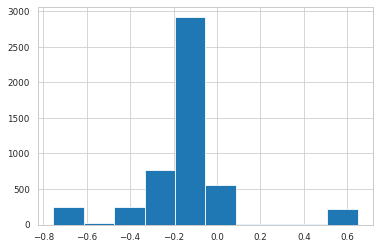

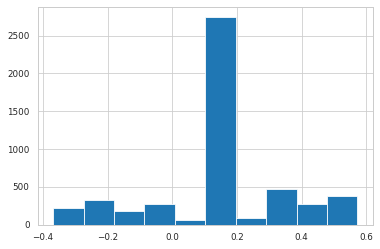

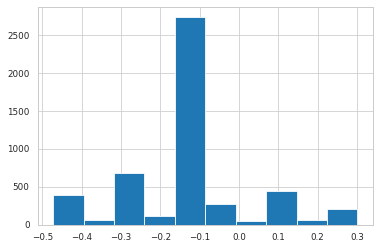

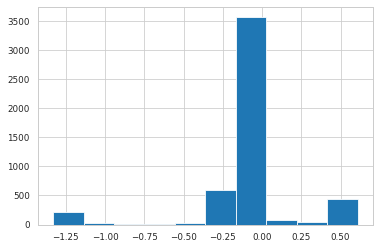

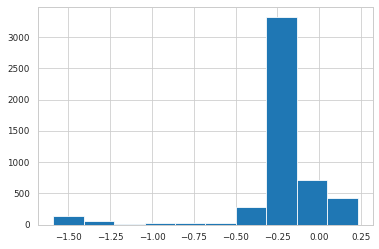

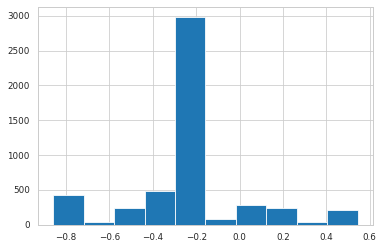

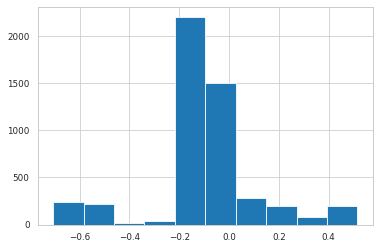

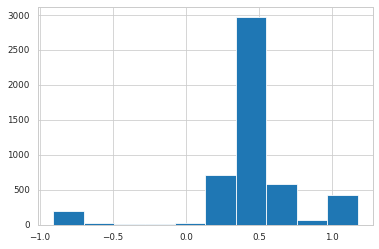

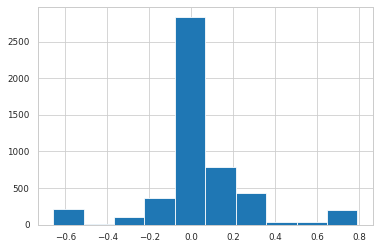

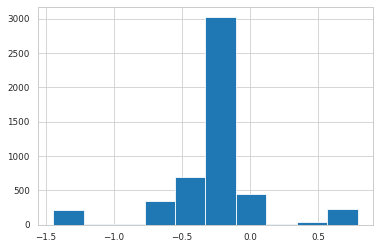

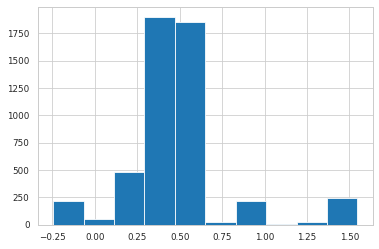

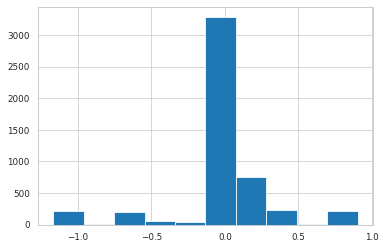

In [127]:
for d in range(15):
    plt.hist(df.values[:,d])
    plt.show()